# Captcha Recognition With K-Nearest-Neighbours

Import required libraries

In [1]:
import numpy as np                  # used for creating numpy arrays for model creation
import cv2                          # used for image processing
import os                           # used to read files and directory structure

Define global variables

In [2]:
RESIZED_IMAGE_WIDTH = 20                    # width of resized image
RESIZED_IMAGE_HEIGHT = 30                   # height of resized image

DATASET_PATH = os.getcwd() + '/dataset/'    # Dataset path

## TRAIN MODEL

### Load Dataset

Open training characters image

In [3]:
X = np.empty((0, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT), 
            dtype = np.float32)         # flattened images
y = []                                  # labels

In [4]:
for char in os.listdir(DATASET_PATH):               # for each character folder
    print(char)                                     # print the character name
    if (len(char) > 1):                             # if the folder name is more than 1 character, skip it
        continue
    for img in os.listdir(DATASET_PATH + char):     # for each image in the folder
        if img[-3:] != 'png':                       # if the image is not a png file, skip it
            continue
        image = cv2.imread(DATASET_PATH + char + '/' + img, 
                            cv2.IMREAD_GRAYSCALE)   # read the image
        flattenedImage = image.reshape((1, 
                    RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))    # flatten the image
        X = np.append(X, flattenedImage, 0)         # append the image to the X array
        y.append(ord(char))                         # append the class number to the y array

R
U
9
7
I
N
G
6
Z
1
8
T
S
A
F
H
M
J
C
D
V
Q
4
X
3
E
B
K
L
2
Y
5
P
W


In [5]:
# convert to numpy arrays
y = np.array(y, np.float32)

In [6]:
print(X.shape)
print(y.shape)

(10000, 600)
(10000,)


Plot Dataset

In [7]:
import seaborn as sns                   # used for plotting graphs
import matplotlib.pyplot as plt         # used for plotting graphs

In [8]:
plot = np.unique(y, return_counts=True)                 # count the number of times each class occurs
for i in range(len(plot[0])):
    print(chr(int(plot[0][i])), plot[1][i])             # print the character and its count

1 304
2 275
3 311
4 301
5 289
6 262
7 307
8 309
9 303
A 311
B 320
C 324
D 297
E 270
F 313
G 285
H 277
I 305
J 316
K 289
L 4
M 287
N 322
P 295
Q 331
R 294
S 325
T 289
U 327
V 297
W 313
X 344
Y 286
Z 318


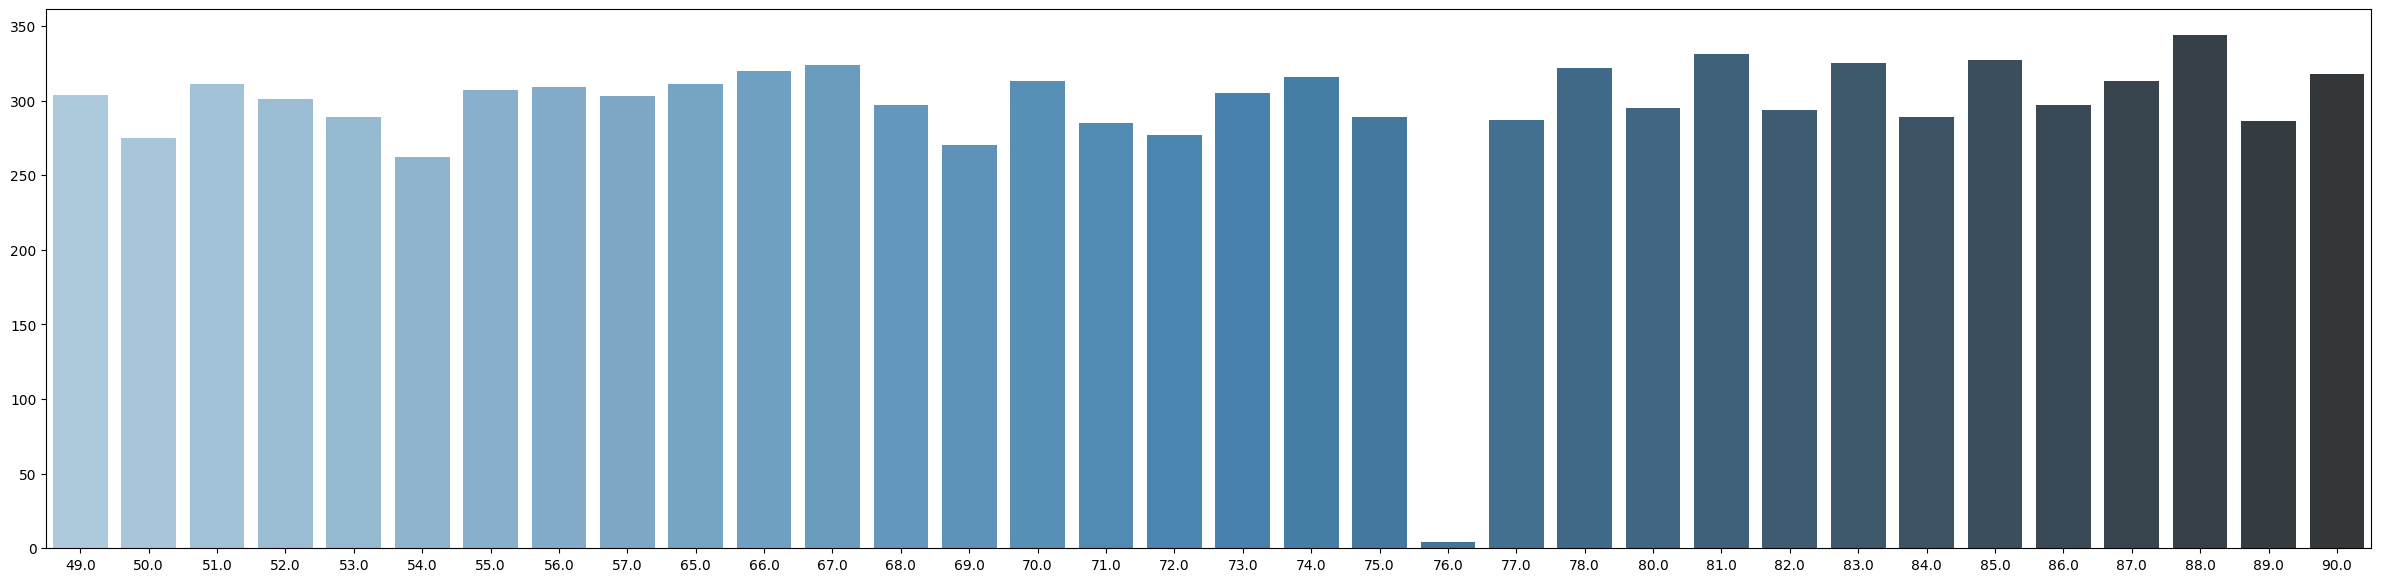

In [9]:
plt.figure(figsize = (30, 7))                                       # set the size of the plot
sns.barplot(x = plot[0], y = plot[1], palette='Blues_d')            # plot the graph
plt.show()                                                          # show the graph

### Split dataset in training and testing data

Import Libraries

In [10]:
from sklearn.neighbors import KNeighborsClassifier       # KNN classifier
from sklearn.model_selection import train_test_split     # used for splitting the dataset into training and testing sets
from sklearn.metrics import classification_report        # used for evaluating the model

Split Dataset

In [11]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Plot Training Data

In [12]:
plot_train = np.unique(y_train, return_counts=True)     # count the number of times each class occurs in training set
for i in range(len(plot_train[0])):
    print(chr(int(plot_train[0][i])), plot_train[1][i]) # print the character and its count

1 238
2 216
3 236
4 238
5 244
6 208
7 240
8 239
9 242
A 250
B 251
C 255
D 244
E 212
F 251
G 239
H 220
I 245
J 260
K 227
L 3
M 230
N 252
P 248
Q 265
R 232
S 272
T 230
U 256
V 229
W 253
X 289
Y 226
Z 260


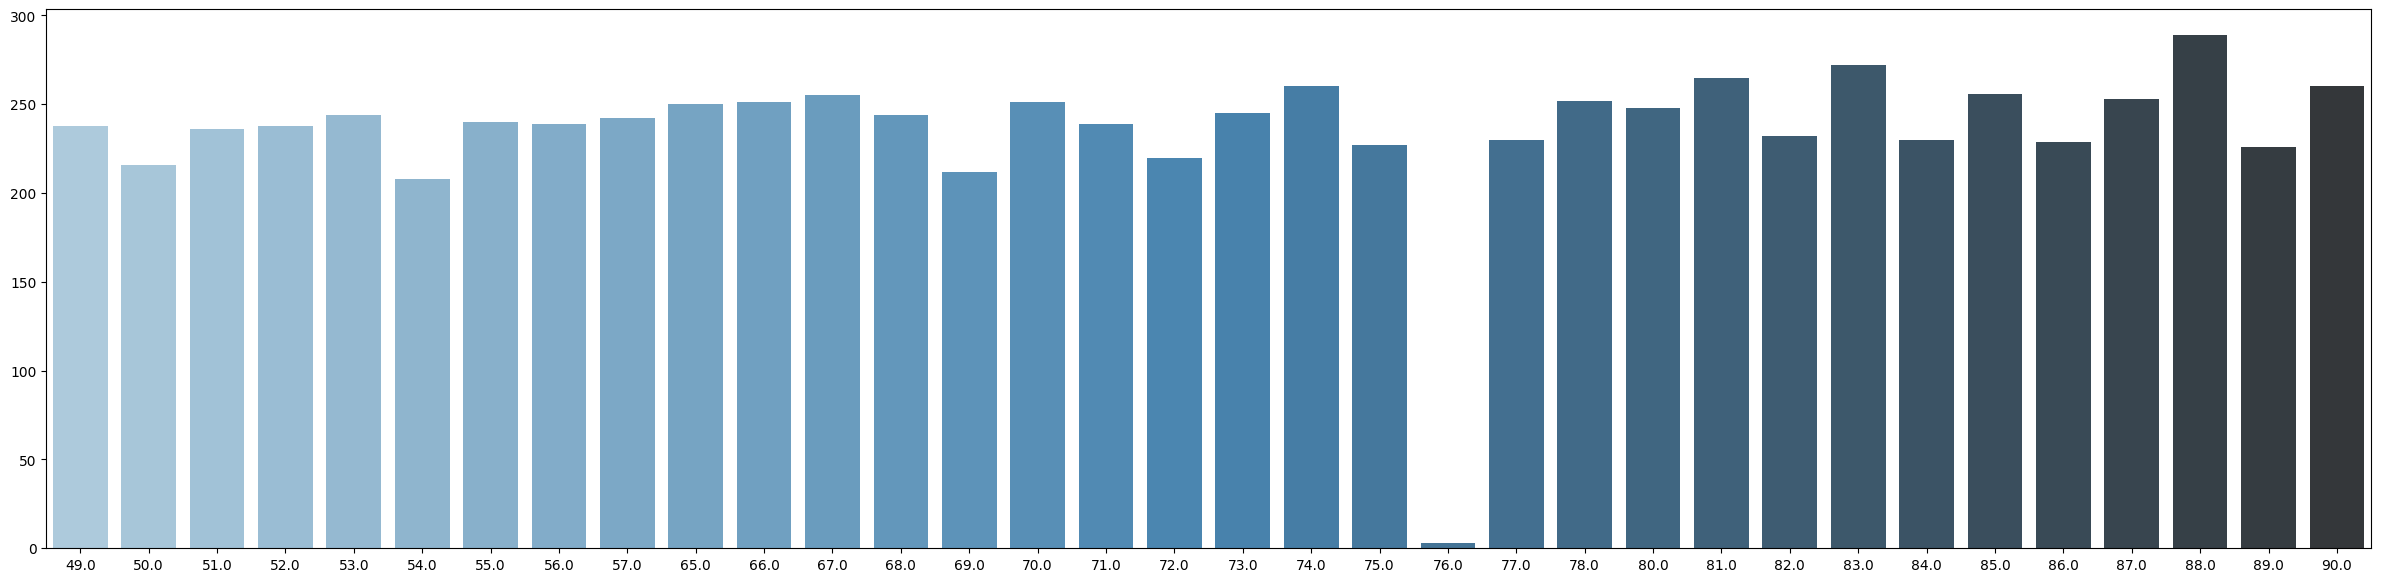

In [13]:
plt.figure(figsize = (30, 7))                                           # set the size of the plot
sns.barplot(x = plot_train[0], y = plot_train[1], palette='Blues_d')    # plot the graph
plt.show()                                                              # show the graph

Plot Testing Data

In [14]:
plot_test = np.unique(y_test, return_counts=True)       # count the number of times each class occurs in testing set
for i in range(len(plot_test[0])):  
    print(chr(int(plot_test[0][i])), plot_test[1][i])   # print the character and its count

1 66
2 59
3 75
4 63
5 45
6 54
7 67
8 70
9 61
A 61
B 69
C 69
D 53
E 58
F 62
G 46
H 57
I 60
J 56
K 62
L 1
M 57
N 70
P 47
Q 66
R 62
S 53
T 59
U 71
V 68
W 60
X 55
Y 60
Z 58


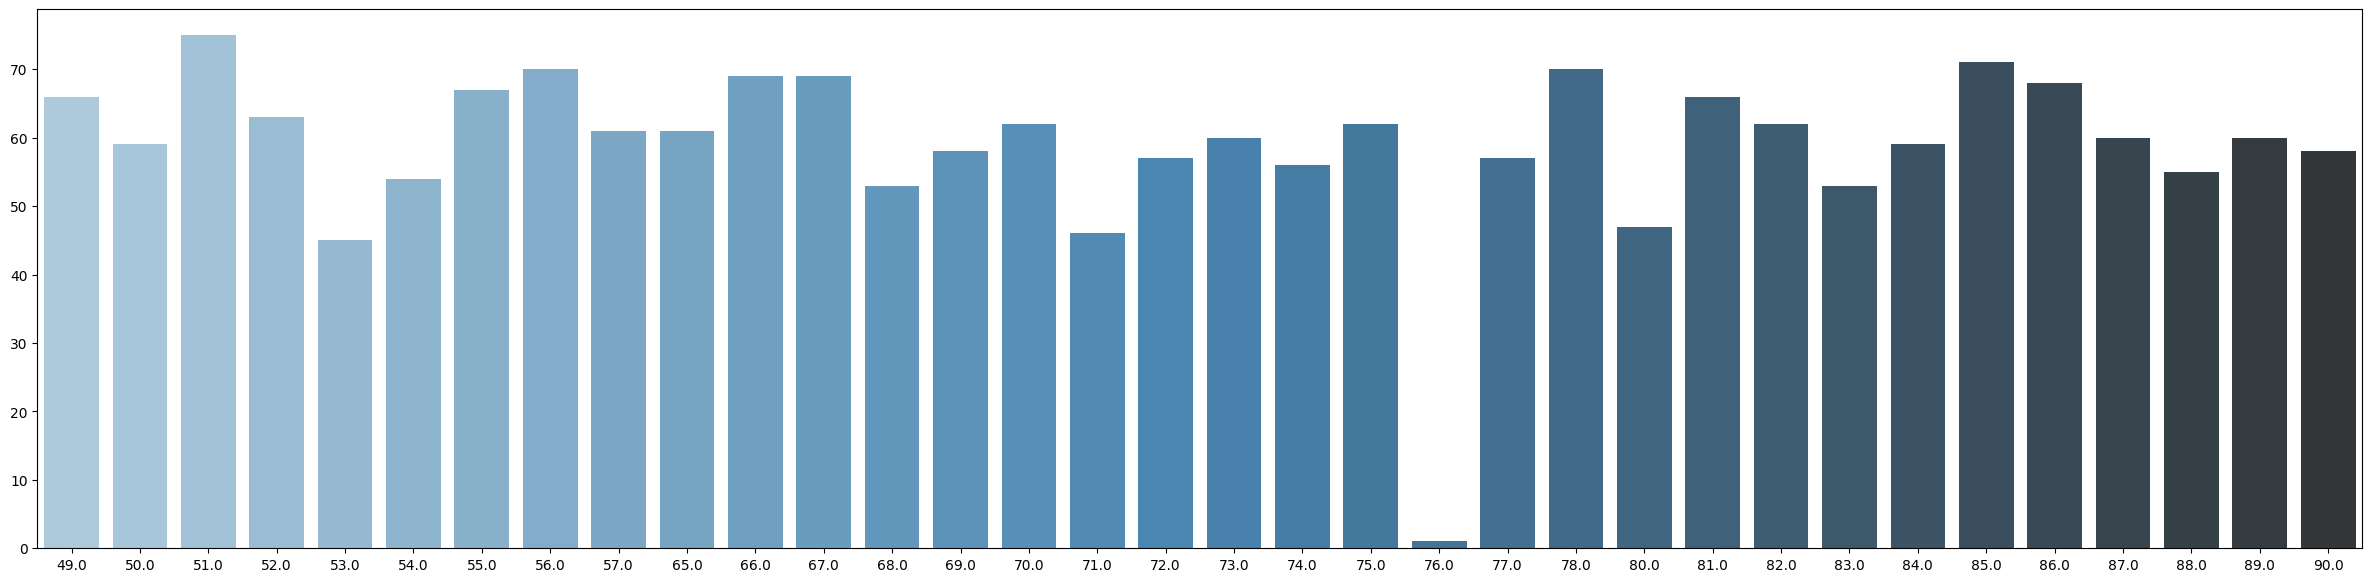

In [15]:
plt.figure(figsize = (30, 7))                                           # set the size of the plot
sns.barplot(x = plot_test[0], y = plot_test[1], palette = 'Blues_d')    # plot the graph
plt.show()                                                              # show the graph

### Create K-Nearest-Neighbours Model

Create KNN object

In [31]:
kNearest = KNeighborsClassifier(n_neighbors = 7, 
                                weights = 'distance')       # create the KNN classifier
kNearest.fit(X_train, y_train)                              # train the model

KNeighborsClassifier(n_neighbors=7, weights='distance')

Print Model Statistics

In [17]:
# print classification report
test_score = classification_report(y_test, kNearest.predict(X_test), output_dict=True)
print(classification_report(y_test, kNearest.predict(X_test)))

/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

        49.0       0.82      0.89      0.86        66
        50.0       1.00      0.98      0.99        59
        51.0       0.94      0.97      0.95        75
        52.0       0.98      1.00      0.99        63
        53.0       0.92      0.98      0.95        45
        54.0       0.98      0.98      0.98        54
        55.0       0.99      1.00      0.99        67
        56.0       0.84      0.91      0.88        70
        57.0       1.00      0.93      0.97        61
        65.0       1.00      1.00      1.00        61
        66.0       0.72      0.81      0.76        69
        67.0       0.86      0.93      0.90        69
        68.0       0.88      0.96      0.92        53
        69.0       0.94      0.81      0.87        58
        70.0       0.93      0.92      0.93        62
        71.0       0.89      0.89      0.89        46
        72.0       0.80      0.84      0.82        57
        73.0       0.83    

/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [18]:
import pandas as pd

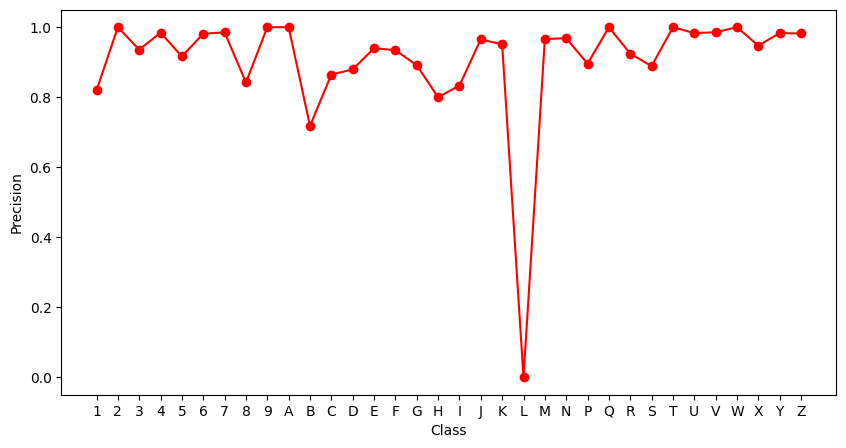

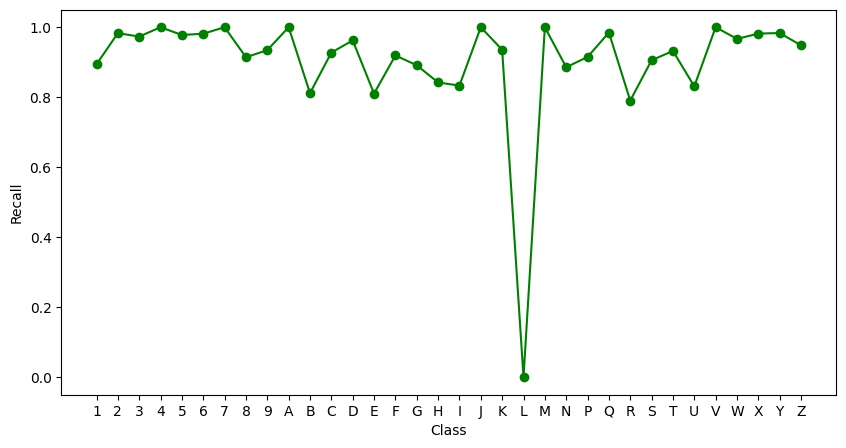

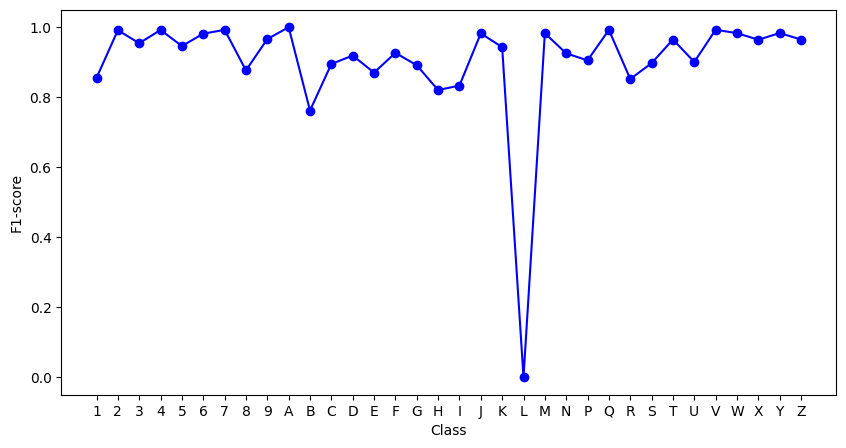

In [19]:
# plot accuracy for each class
df = pd.DataFrame(test_score).transpose()                           # convert the dictionary to a dataframe
df = df[:-3]                                                        # remove accuracy, macro avg, weighted avg
df['class'] = df.index                                              # add a column for class name
df['class'] = df['class'].apply(lambda x: chr(int(float(x))))       # convert class number to character

plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['precision'], label = 'precision', color = 'red', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['recall'], label = 'recall', color = 'green', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['f1-score'], label = 'f1-score', color = 'blue', marker = 'o')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.show()

### Hyperparameter Tuning

Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV    # used for hyperparameter tuning

In [21]:
k_range = list(range(1, 11))                       # range of k values
param_grid = dict(n_neighbors = k_range)           # create a parameter grid: map the parameter names to the values that should be searched

In [22]:
grid = GridSearchCV(kNearest, param_grid, cv=10,
                    scoring='accuracy')           # instantiate the grid
grid.fit(X, y)                                    # fit the grid with data

/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [23]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.9214 0.8958 0.9266 0.9251 0.9326 0.9307 0.9345 0.9306 0.9335 0.9324]


Text(0, 0.5, 'Cross-Validated Accuracy')

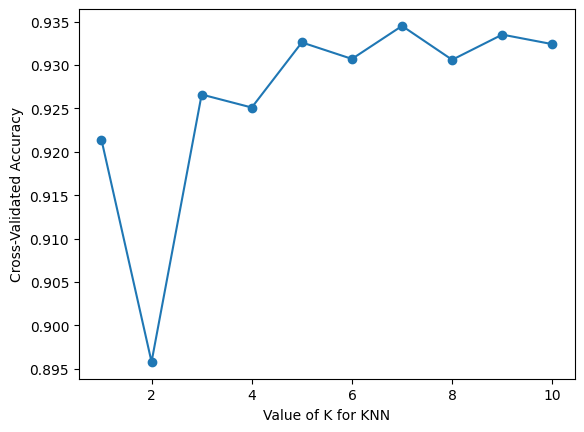

In [24]:
plt.plot(k_range, grid_mean_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [25]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9345000000000001
{'n_neighbors': 7}
KNeighborsClassifier(n_neighbors=7)


## TEST MODEL

In [26]:
TEST_IMAGE = 'datasets/' + 'BUAXA.png'       # Test image path

Open testing image

In [27]:
img = cv2.imread(TEST_IMAGE)                # read in testing image
if img is None:                             # if image was not read successfully, exit program
    print("error: image not read from file \n\n")
    exit(0)

In [28]:
IMAGE_WIDTH = img.shape[1]                  # get image width
IMAGE_HEIGHT = img.shape[0]                 # get image height
print(IMAGE_WIDTH, IMAGE_HEIGHT)

180 50


Preprocess Image

In [29]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)                             # convert to grayscale
# cv2.imshow('gray', gray)
# cv2.waitKey(0)

thresh = cv2.adaptiveThreshold( 
                imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                cv2.THRESH_BINARY, 11, 0)                                   # get binary image
# cv2.imshow('thresh', thresh)
# cv2.waitKey(0)

close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
                         np.ones((3, 3), np.uint8))                         # remove noise from image
# cv2.imshow('close', close)
# cv2.waitKey(0)

dilate = cv2.dilate(close, np.ones((2, 2), np.uint8),
                    iterations=1)                                           # get dilated image
# cv2.imshow('dilate', dilate)
# cv2.waitKey(0)

image = cv2.bitwise_not(dilate)                                             # invert image colors
# cv2.imshow('image', image)
# cv2.waitKey(0)


Predict Captcha

In [30]:
for i in range(0, IMAGE_WIDTH, IMAGE_WIDTH//5):
    # get character from captcha
    letter = image[5:IMAGE_HEIGHT-5, i:i+IMAGE_WIDTH//5]
    # resize image to 20x30
    letter = cv2.resize(letter, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))
    # dilate image
    letter = cv2.dilate(letter, np.ones((2, 2), np.uint8), iterations=1)
    # flatten image to 1d numpy array
    letter = letter.reshape((1, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))
    letter = np.float32(letter)
    # get nearest neighbor
    res = kNearest.predict(letter)
    # print predicted character
    print(chr(int(res[0])), end = '')

    # show image
    cv2.rectangle(img, (i, 5), (i+IMAGE_WIDTH//5, IMAGE_HEIGHT-5), (0, 255, 0), 1)
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
cv2.destroyAllWindows()
cv2.waitKey(1)


BUAXA

-1